### Modeling

In [39]:
#grab the train/test splits from the Pre-processing notebook
%store -r

In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC, SVC

In [3]:
model_params = {}
count = 1

In [4]:
#calculate scores and build the dataframe that we learned in class, SO helpful patrick!
def scoring(X_test,y_test,model,count):
    preds = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    plot_confusion_matrix(model, X_test, y_test, cmap='Purples', values_format='d')
    plt.title(f"Confustion Matrix ")
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    misclassified = (fp+fn)/(tn+tp+fn+fp)
    grid.best_params_['score'] = grid.best_score_
    grid.best_params_['specificity'] = round((specificity *100),2)
    grid.best_params_['sensitivity'] = round((sensitivity *100),2)
    grid.best_params_['misclassification_rate'] = round(misclassified * 100,2)
    grid.best_params_['misclassified_rows'] = np.where(y_test != grid.predict(X_test))
    model_params[f'model_{count}'] = grid.best_params_
    model_df = pd.DataFrame.from_dict(model_params, orient='index')
    
    print(f'model_{count}')
    return model_df

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   10.4s finished


model_11
model_11
CPU times: user 10.5 s, sys: 186 ms, total: 10.6 s
Wall time: 10.7 s


,actual,predicted
2922,0,0
1407,0,0
5513,1,0
5352,1,1
7639,1,1
...,...,...
913,0,0
6059,1,1
8618,1,1
8783,1,1


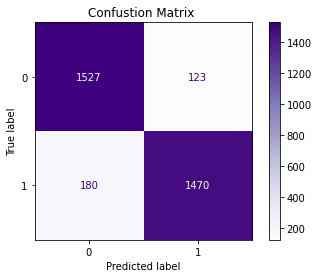

In [64]:
%%time
#Start with a Multinomial Naive Bayes using a pipeline and gridsearching, like leson 5.04
pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('MultiNB', MultinomialNB()),
])
pipe_params = {
    'vectorizer__max_features' :[2000,2500,3000,3250],
    'vectorizer__min_df' : [1],
    'vectorizer__max_df' : [.7,.75,.8,],
    'vectorizer__stop_words' : [None, 'english'],
    'vectorizer__ngram_range' :[(1,1)]
}
grid = GridSearchCV(estimator = pipe,
                   param_grid = pipe_params,
                   cv = 5,
                   verbose = 1)


grid.fit(X_train,y_train)
print(f'model_{count}')
model_df =scoring(X_test,y_test,grid,count)
count+=1
y_preds = pd.DataFrame()
y_preds['actual']=y_test
y_preds['predicted']=grid.predict(X_test)
y_preds

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:  1.8min finished


model_2
model_2
CPU times: user 1min 45s, sys: 1.3 s, total: 1min 47s
Wall time: 1min 48s


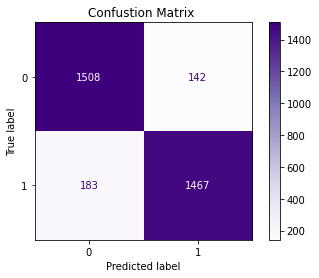

In [6]:
%%time
#let's try the NB model with Tfidif
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('MultiNB', MultinomialNB()),
])
pipe_params = {
    'tvec__max_features' : [5000,6000,7000],
    'tvec__ngram_range' : [ (1,1),(1,2),(2,2)],
    'tvec__stop_words' : ['english', None],
    'tvec__max_df' : [.85,.95,.97],
    'tvec__min_df' : [1,2,4]
}
grid = GridSearchCV(estimator = pipe,
                   param_grid = pipe_params,
                   cv = 5,
                   verbose = 1)


grid.fit(X_train,y_train)
print(f'model_{count}')
model_df = scoring(X_test,y_test,grid,count)
count+=1

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:  3.2min finished


model_3
model_3
CPU times: user 3min 6s, sys: 2.45 s, total: 3min 8s
Wall time: 3min 12s


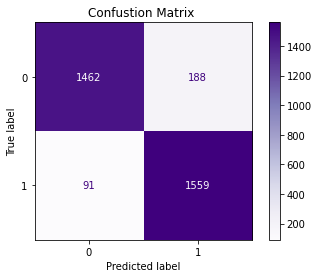

In [7]:
%%time
#trying the Logistic Regression again with countvectorizer
pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('lr', LogisticRegression())
])
pipe_params = {
    'vectorizer__max_features' :[2000,3000,3250],
    'vectorizer__min_df' : [1,2,3],
    'vectorizer__max_df' : [.7,.75,.8,],
    'vectorizer__stop_words' : [None, 'english'],
    'vectorizer__ngram_range' :[(1,1),(1,2),(1,3)]
}
grid = GridSearchCV(estimator = pipe,
                   param_grid = pipe_params,
                   cv = 5,
                   verbose = 1)

grid.fit(X_train,y_train)
print(f'model_{count}')

model_df = scoring(X_test,y_test,grid,count)
count+=1

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:  2.4min finished


model_4
model_4
CPU times: user 2min 19s, sys: 1.57 s, total: 2min 20s
Wall time: 2min 23s


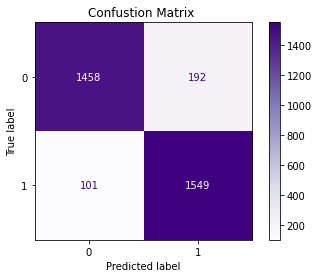

In [8]:
%%time
#let's try a logistic regression with tvec
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('lr', LogisticRegression())
])
pipe_params = {
    'tvec__max_features' : [5000,6000,7000],
    'tvec__ngram_range' : [ (1,1),(1,2),(2,2)],
    'tvec__stop_words' : ['english', None],
    'tvec__max_df' : [.85,.95,.97],
    'tvec__min_df' : [1,2,4]
}
grid = GridSearchCV(estimator = pipe,
                   param_grid = pipe_params,
                   cv = 5,
                   verbose = 1)


grid.fit(X_train,y_train)
print(f'model_{count}')

model_df =scoring(X_test,y_test,grid,count)
count+=1

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   14.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   47.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done 1215 out of 1215 | elapsed:  4.7min finished


model_5
model_5


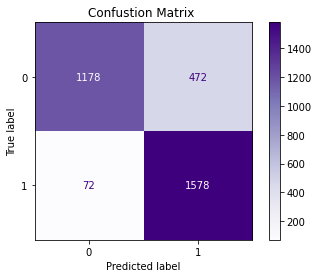

In [9]:

#checking out random forest

pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

params = {
    'vectorizer__max_features' :[2000,3000,4000],
    'rf__n_estimators' : [50, 75, 100],
    'rf__max_features' : [None,'auto', 'log2'],
    'rf__max_depth' : [3, 5, 7],
    'rf__ccp_alpha' : [0,0.01,0.1]
}
grid = GridSearchCV(estimator = pipe, 
                    param_grid = params, 
                    cv = 5,
                    verbose = 1,
                    n_jobs = 4)


grid.fit(X_train, y_train)
print(f'model_{count}')


model_df = scoring(X_test,y_test,grid,count)
count+=1


Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   21.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  4.7min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  5.8min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  7.7min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 14.5min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 16.4min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed: 24.4min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed: 29.2min
[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed: 32.5min
[Parallel(n_jobs=4)]: Done 6042 tasks      | elapsed: 38.7min
[Parallel(n_jobs=4)]: Done 7192 tasks      | elapsed: 49.6min
[Parallel(n_jobs=4)]: Done 8442 tasks      | elapsed: 55.8min
[Parallel(n_jobs=4)]: Done 9792 tasks      | elapsed: 65.0min
[Parallel(n_jobs=4)]: Done 10935 out of 10935 | elapsed: 74.3

model_6
model_6


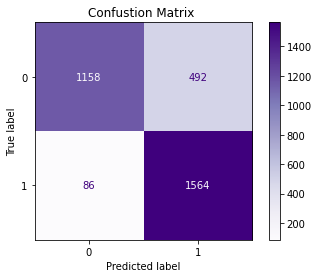

In [14]:

#checking out random forest but with tfid

pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

params = {
    'tvec__max_features' : [5000,6000,7000],
    'tvec__max_df' : [.85,.95,1.0],
    'tvec__min_df' : [1,2,4],
    'rf__n_estimators' : [50, 75, 100],
    'rf__max_features' : [None,'auto', 'log2'],
    'rf__max_depth' : [3, 5, 7],
    'rf__ccp_alpha' : [0,0.01,0.1]
}
grid = GridSearchCV(estimator = pipe, 
                    param_grid = params, 
                    cv = 5,
                    verbose = 1,
                    n_jobs = 4)


grid.fit(X_train, y_train)
print(f'model_{count}')


model_df = scoring(X_test,y_test,grid,count)
count+=1


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  1.9min finished


model_7
model_7
CPU times: user 1min 43s, sys: 2.16 s, total: 1min 45s
Wall time: 1min 55s


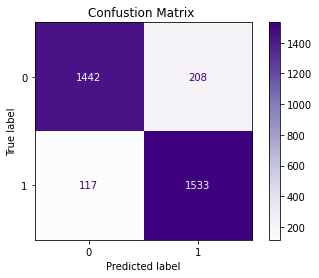

In [15]:
%%time
#trying Linear SVC
pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('svc', (LinearSVC()))
])
pipe_params = {
    'vectorizer__max_features' :[2000,3000,4000],
    'vectorizer__min_df' : [1,2],
    'vectorizer__max_df' : [.8,.9],
    'vectorizer__stop_words' : [None, 'english'],
    'vectorizer__ngram_range' :[(1,1),(2,2)],
    'svc__C': [.001,.01,1]

}

grid = GridSearchCV(estimator = pipe,
                   param_grid = pipe_params,
                   cv = 5,
                   verbose = 1)

grid.fit(X_train,y_train)
print(f'model_{count}')

model_df = scoring(X_test,y_test,grid,count)
count+=1

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  1.2min finished


model_8
model_8
CPU times: user 54.5 s, sys: 1.62 s, total: 56.1 s
Wall time: 1min 14s


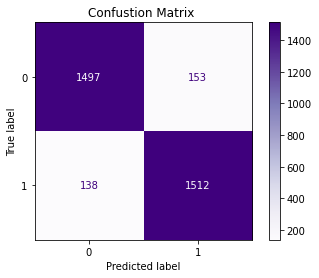

In [16]:
%%time
#trying the Logistic Regression again but adjusting the max_df parameter since it was on the edge
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('svc', (LinearSVC()))
])
pipe_params = {
    'tvec__max_features' : [5000,6000,7000],
    'tvec__max_df' : [.85,.95,1.0],
    'tvec__min_df' : [1,2,4],
    'svc__C': [.001,.01,1]
}


grid = GridSearchCV(estimator = pipe,
                   param_grid = pipe_params,
                   cv = 5,
                   verbose = 1)

grid.fit(X_train,y_train)
print(f'model_{count}')

model_df = scoring(X_test,y_test,grid,count)
count+=1

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   22.6s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  7.8min
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed: 11.7min
[Parallel(n_jobs=4)]: Done 1440 out of 1440 | elapsed: 18.6min finished


model_9
model_9
CPU times: user 11.7 s, sys: 1.77 s, total: 13.4 s
Wall time: 18min 39s


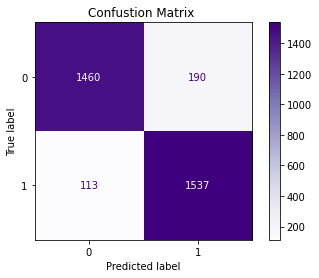

In [18]:
%%time
#trying the svc model
pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('svc', SVC())
])
pipe_params = {
    'vectorizer__max_features' :[2000,3000,4000],
    'vectorizer__min_df' : [1,2],
    'vectorizer__max_df' : [.8,.9],
    'vectorizer__stop_words' : [None, 'english'],
    'vectorizer__ngram_range' :[(1,1),(1,2),(1,3)],
    'svc__kernel':['linear', 'rbf'],
    'svc__degree':[1, 2]}


grid = GridSearchCV(estimator = pipe,
                   param_grid = pipe_params,
                   cv = 5,
                   n_jobs = 4,
                   verbose =2)

grid.fit(X_train,y_train)
print(f'model_{count}')

model_df = scoring(X_test,y_test,grid,count)
count+=1

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   33.5s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  5.0min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  7.5min finished


model_10
model_10
CPU times: user 9.93 s, sys: 669 ms, total: 10.6 s
Wall time: 7min 36s


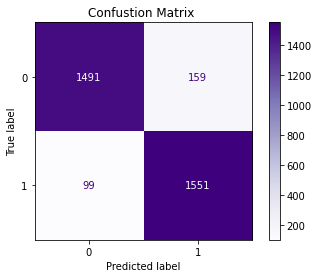

In [19]:
%%time
#trying the svc model
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('svc', SVC())
])
pipe_params = {
    'tvec__max_features' : [5000,6000,7000],
    'tvec__max_df' : [.85,.95,1.0],
    'tvec__min_df' : [1,2,4],
    'svc__kernel':['linear', 'rbf'],
    'svc__degree':[1, 2]}


grid = GridSearchCV(estimator = pipe,
                   param_grid = pipe_params,
                   cv = 5,
                   n_jobs = 4,
                   verbose =2)

grid.fit(X_train,y_train)
print(f'model_{count}')

model_df = scoring(X_test,y_test,grid,count)
count+=1

In [20]:
model_df

,vectorizer__max_df,vectorizer__max_features,vectorizer__min_df,vectorizer__ngram_range,vectorizer__stop_words,score,specificity,sensitivity,misclassification_rate,misclassified_rows,...,tvec__min_df,tvec__ngram_range,tvec__stop_words,rf__ccp_alpha,rf__max_depth,rf__max_features,rf__n_estimators,svc__C,svc__degree,svc__kernel
model_1,0.7,3000.0,1.0,"(1, 1)",None,0.907612,92.55,89.09,9.18,"([2, 12, 18, 52, 66, 67, 74, 76, 79, 82, 96, 1...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_3,0.7,3000.0,1.0,"(1, 1)",None,0.911194,88.61,94.48,8.45,"([12, 52, 58, 66, 67, 76, 94, 110, 129, 132, 1...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_7,0.8,4000.0,1.0,"(1, 1)",english,0.908358,87.39,92.91,9.85,"([36, 52, 58, 64, 67, 94, 100, 104, 132, 135, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
model_9,0.8,3000.0,1.0,"(1, 1)",None,0.908657,88.48,93.15,9.18,"([58, 66, 67, 94, 104, 110, 129, 132, 136, 165...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,linear
model_5,NaN,2000.0,NaN,NaN,NaN,0.836418,71.39,95.64,16.48,"([5, 10, 12, 17, 18, 27, 36, 37, 40, 48, 51, 5...",...,NaN,NaN,NaN,0.0,7.0,auto,100.0,NaN,NaN,NaN
model_2,NaN,NaN,NaN,NaN,NaN,0.904328,91.39,88.91,9.85,"([2, 12, 13, 18, 52, 66, 74, 76, 82, 96, 104, ...",...,1.0,"(1, 2)",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_4,NaN,NaN,NaN,NaN,NaN,0.917313,88.36,93.88,8.88,"([2, 10, 12, 44, 52, 58, 64, 67, 94, 100, 106,...",...,1.0,"(1, 2)",english,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_6,NaN,NaN,NaN,NaN,NaN,0.834328,70.18,94.79,17.52,"([5, 10, 12, 17, 18, 27, 36, 37, 40, 48, 51, 5...",...,2.0,NaN,NaN,0.0,7.0,auto,100.0,NaN,NaN,NaN
model_8,NaN,NaN,NaN,NaN,NaN,0.916269,90.73,91.64,8.82,"([2, 58, 66, 67, 76, 94, 104, 110, 129, 132, 1...",...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
model_10,NaN,NaN,NaN,NaN,NaN,0.923284,90.36,94.00,7.82,"([0, 2, 12, 36, 52, 58, 66, 67, 76, 94, 104, 1...",...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,rbf


In [65]:
model_df.to_csv('./data/misclass_and_model.csv',index_label = 'model_name')